In [1]:
import pandas as pd

/Users/dgates/venvs/py3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('web-traffic-time-series-forecasting/train_1.csv.zip')

In [3]:
df.shape

(145063, 551)

In [4]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [5]:
df = df[~df.isnull().any(axis=1)]
df.shape

(117277, 551)

In [6]:
# name_project_access_agent
def page_features():
    feature_names = ['name', 'project', 'access', 'agent']
    def parse_features(page):
        features = []
        for i in range(len(feature_names)):
            page, sep, feature = page.rpartition('_')
            features.append(feature)
        return features
    page_features = (parse_features(page) for page in df.Page)
    return pd.DataFrame(page_features, columns=feature_names[::-1])
page_features = page_features()       

In [7]:
page_features

,agent,access,project,name
0,spider,all-access,zh.wikipedia.org,2NE1
1,spider,all-access,zh.wikipedia.org,2PM
2,spider,all-access,zh.wikipedia.org,3C
3,spider,all-access,zh.wikipedia.org,4minute
4,spider,all-access,zh.wikipedia.org,5566
5,spider,all-access,zh.wikipedia.org,A'N'D
6,spider,all-access,zh.wikipedia.org,AKB48
7,spider,all-access,zh.wikipedia.org,ASCII
8,spider,all-access,zh.wikipedia.org,Club
9,spider,all-access,zh.wikipedia.org,us


In [8]:
df_train = df.iloc[:,-31:]
df_train.columns = [f'pageviews_{i}' if i != 30 else 'target' for i in range(31)]
df_train.head()

,pageviews_0,pageviews_1,pageviews_2,pageviews_3,pageviews_4,pageviews_5,pageviews_6,pageviews_7,pageviews_8,pageviews_9,...,pageviews_21,pageviews_22,pageviews_23,pageviews_24,pageviews_25,pageviews_26,pageviews_27,pageviews_28,pageviews_29,target
0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5,18.0,15.0,19.0,35.0,16.0,25.0,13.0,19.0,15.0,25.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0


In [9]:
df_train = df_train.merge(page_features, left_index=True, right_index=True)

In [10]:
df_train.agent.nunique(), df_train.access.nunique(), df_train.project.nunique()

(2, 3, 9)

In [11]:
import feature_columns
import keras
import numpy as np
static_feature_set = feature_columns.FeatureSet(
    feature_columns.OneHotFeature('agent', X=page_features.agent),
    feature_columns.OneHotFeature('access', X=page_features.access),
    feature_columns.EmbeddedFeature('project', X=page_features.project, embedding_dim=3)
)

def normalizer(x):
    return np.log10(x+1e-1)
pageviews_feature_set = feature_columns.FeatureSet(*[
    feature_columns.NumericFeature(f'pageviews_{i}', normalizer=normalizer) for i in range(30)
])

sequences = [keras.layers.Concatenate()([static_feature_set.output, f.output])
             for f in pageviews_feature_set.features]

all_feature_set = feature_columns.FeatureSet.combine(static_feature_set, pageviews_feature_set)

Using TensorFlow backend.


In [12]:
concat = keras.layers.Concatenate()
reshape = keras.layers.Reshape((30, -1))
lstm_input = reshape(concat(sequences))
lstm = keras.layers.LSTM(512)(lstm_input)
output = keras.layers.Dense(1)(lstm)

In [13]:
model = keras.models.Model(inputs=all_feature_set.inputs, outputs=output)

In [14]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
project_1 (InputLayer)          (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 3)         30          project_1[0][0]                  
__________________________________________________________________________________________________
agent_1 (InputLayer)            (None, 3)            0                                            
__________________________________________________________________________________________________
access_2 (InputLayer)           (None, 4)            0                                            
__________________________________________________________________________________________________
flatten_1 

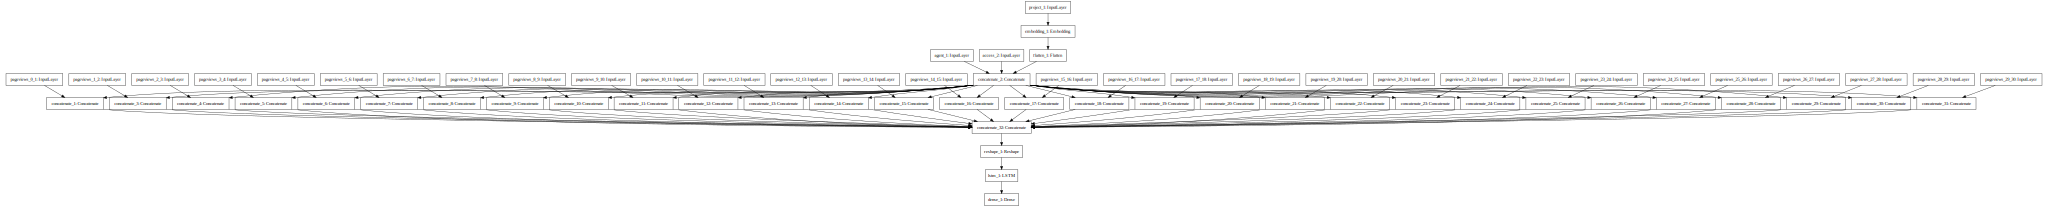

In [15]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [16]:
import numpy as np
train_idx = np.random.choice([True, False], p=[0.75, 0.25], size=len(df_train))

In [17]:
X_train = df_train[train_idx]
X_test = df_train[~train_idx]
y_train = X_train['target']
y_test = X_test['target']

In [18]:
X_train = all_feature_set.transform(X_train)
X_test = all_feature_set.transform(X_test)

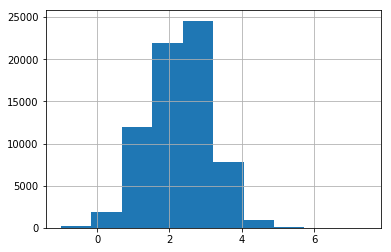

In [19]:
np.log10(y_train+1e-1).hist()

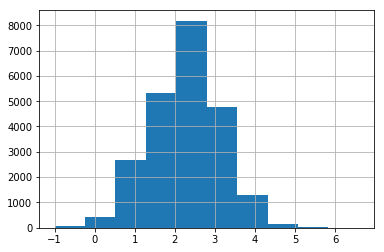

In [20]:
np.log10(y_test+1e-1).hist()

In [21]:
import tensorflow as tf
model.compile(loss=tf.losses.huber_loss, optimizer='adam')

In [22]:
model.fit(
    X_train, np.log10(y_train+1),
    epochs=3,
    validation_data=(X_test, np.log10(y_test+1)))

Train on 69381 samples, validate on 22838 samples
Epoch 1/10
69381/69381 [==============================] - 343s 5ms/step - loss: 0.0277 - val_loss: 0.0228
Epoch 2/10
69381/69381 [==============================] - 336s 5ms/step - loss: 0.0203 - val_loss: 0.0194
Epoch 3/10
69381/69381 [==============================] - 333s 5ms/step - loss: 0.0195 - val_loss: 0.0197
Epoch 4/10
32544/69381 [=============>................] - ETA: 2:44 - loss: 0.0192

KeyboardInterrupt: 

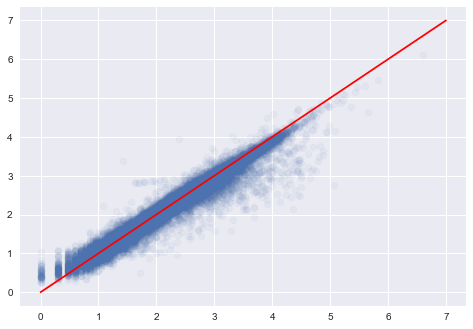

In [25]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
p = model.predict(X_test)[:, 0]
plt.scatter(np.log10(y_test+1), p, alpha=0.05)
plt.plot([0, 7], [0, 7], color='r')